# 머신러닝

- 수치를 예측하는 회귀, 카테고리를 예측하는 분류, 최적의 추천 등을 수행하는 소프트웨어로, 데이터를 보고 학습하여 점차 성능이 개선된다
- 현재 인공지능을 구현하는 대표적인 방법이 머신러닝 기법이다
 - 인공지능을 구현하는 다른 방법으로 "생각하는" 컴퓨터를 만들거나, 언어를 문법적으로 이해하는 컴퓨터를 만드는 것, 또는 사람의 지식을 알고리즘이나 데이터로 구축하는 방법은 성공하지 못했다


- 머신러닝 동작
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.38.png?raw=1" align='left'>

### 데이터 (X)
- 훈련 (train) 데이터: 모델을 학습시키는데 사용하는 데이터
- 검증 (validation) 데이터: 학습시킨 모델의 동작을 검증하는데 사용하는 데이터
- 학습에 사용하는 데이터가 많을수록 예측, 추천 성능이 향상된다
 - 데이터 타입: 정형 데이터(테이블 데이터), 비정형 데이터(이미지, 텍스트, 센서 데이터 등)
- 머신러닝 모델의 성능을 높이기 위해서는 원시(raw) 데이터로부터 적절한 학습 및 검증 데이터를 만드는 **데이터 전처리**가 반드시 필요하다

### 머신러닝 모델
- 입력 데이터(X)로부터 최적의 출력(y)을 얻는 소프트웨어
- 최적의 출력이란 정답(label, target)을 잘 예측하는 것을 말한다
 - 최적의 출력을 얻기 위해서 모델을 구성하는 파라미터의 최적치를 찾는다(예: 선형 회귀에서 가중치 값)
- 모델의 종류: 선형모델, 로지스틱 회귀, SVM, 결정트리, 랜덤 포레스트, kNN, 베이시언, 딥러닝 모델 (MLP, CNN, RNN 등)

### 목적
- 머신러닝의 목적은 다음 중 하나이다
 - 예측(predictive) 분석
> 회귀 예측(regression): 수치를 예측  
> 분류 예측(classification): 카테고리를 예측
 - 설명(descriptive)적 분석
 - 군집화(clustering)
 - 추천(recommendation)

### 성능평가 (performance measure)
- 모델이 원하는 동작을 잘 수행하는지를 평가하는 값으로, 주요 평가 척도는 다음과 같다
 - 회귀모델에서는 R-squared를 사용
 - 분류 모델에서는 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수, ROC-AUC 등을 사용

### 최적화기 (optimizer)
- 학습을 통하여 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 최적화 알고리즘으로는 경사하강법(GD: gradient descent)이 기본적으로 사용된다

### 손실함수 (loss function)
- 최적화기는 손실함수를 최소화 하는 방향으로 동작한다
- 즉, 손실함수는 최적화기의 동작이 잘 이루어지고 있는지를 모니터링하는 값이다
- 손실함수로, 회귀 모델에서는 MSE(mean square error)를, 분류에서는 크로스 엔트로피(cross entrophy)를 주로 사용한다


# 타이타닉 생존자 예측

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.36.15.png?raw=1" width=400 align='left'>

# 데이터
- 타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

## import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier


# 맥에서 레티나 디스플레이 사용 설정
%config InlineBackend.figure_format = 'retina'


## 데이터 전처리

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링

In [2]:
## 데이터 전처리 전과정 실행

# 데이터 다운로드
df = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")

# 사용하지 않을 컬럼 4개 삭제
df = df[df.columns.difference(['PassengerId','Name','Ticket','Cabin'])]
# 나이 결측치를 평균 나이로 대체 (대체한 것을 즉시 반영했다)
df.Age.fillna(df.Age.mean(), inplace=True)
# Embarked (항구명) 결측치가 있는 두 샘플은 삭제
df = df[~df["Embarked"].isnull()]

# 선실등급, 성별, 항구명을 원핫 인코딩
df = pd.get_dummies(df, columns=['Pclass','Sex','Embarked'])
# 요금(Fare)은 로그를 취한 값을 사용
df["Fare"] = np.log(df.Fare +1)
# 연속형 변수에 표준 스케일링 적용
scaler = StandardScaler()
df[['Age','Fare','SibSp','Parch']] = scaler.fit_transform(df[['Age','Fare','SibSp','Parch']])

# X와 y 얻기
X = df[df.columns.difference(['Survived'])]
y = df.Survived

print(X.shape)
X[:5]

(889, 12)


,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp
0,-0.590495,0,0,1,-0.877591,-0.474326,0,0,1,0,1,0.431350
1,0.643971,1,0,0,1.366380,-0.474326,1,0,0,1,0,0.431350
2,-0.281878,0,0,1,-0.796281,-0.474326,0,0,1,1,0,-0.475199
3,0.412509,0,0,1,1.066796,-0.474326,1,0,0,1,0,0.431350
4,0.412509,0,0,1,-0.781901,-0.474326,0,0,1,0,1,-0.475199


# 선형 분류 예측
- 개인별 정보를 보고 이 사람의 생존 여부를 예측하는 선형 분류 모델을 만들어 보겠다

## 이진 분류를 위한 결정 경계 (decision boundary)
- 하나의 변수만 사용하는 경우 선형분류 결정 경계: $x_{1} > b$  
- 두 개의 변수를 사용하는 경우 선형분류 결정 경계: $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     > $x_{2} > -$$a_{1}\over a_{2}$ $x_{1} - $$b\over{a_{2}}$


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=550 align='left'>


## 모델 훈련 및 성능 측정

### 데이터 나누기
-  X와 y를 훈련 데이터와 검증 데이터로 나눈다
- train_test_split()를 사용한다

In [3]:
## X와 y를 훈련 데이터와 검증 데이터로 나눈다 (디폴트 비율은 75%: 25%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

# 훈련 및 검증 데이터 수
len(X_train), len(X_test)

(666, 223)

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

### 모델 선택, 학습, 평가

In [4]:
## 선형 분류 모델로 SGDClassifier를 사용

# 모델 생성
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()

# 학습 데이터를 사용하여 학습을 수행
model.fit(X_train, y_train)

# 검증 데이터를 사용하여 모델의 성능을 확인한다 (정확도를 알려준다)
model.score(X_test, y_test)

0.7623318385650224

## 예측 결과 보기

In [5]:
# X_test 내용 보기

df_test = X_test.copy()
df_test[:5]

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp
40,0.798279,0,0,1,-0.630716,-0.474326,0,0,1,1,0,0.431350
696,1.106896,0,0,1,-0.781901,-0.474326,0,0,1,0,1,-0.475199
214,0.003524,0,1,0,-0.816755,-0.474326,0,0,1,0,1,0.431350
460,1.415512,0,0,1,0.369083,-0.474326,1,0,0,0,1,-0.475199
507,0.003524,0,0,1,0.369083,-0.474326,1,0,0,0,1,-0.475199


In [6]:
# 예측값

y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [7]:
# X_test, 실제값 y, 예측값 y 보기

df_test['y_test'] = y_test
df_test['y_pred'] = y_pred
df_test[:10]

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp,y_test,y_pred
40,0.798279,0,0,1,-0.630716,-0.474326,0,0,1,1,0,0.431350,0,0
696,1.106896,0,0,1,-0.781901,-0.474326,0,0,1,0,1,-0.475199,0,0
214,0.003524,0,1,0,-0.816755,-0.474326,0,0,1,0,1,0.431350,0,0
460,1.415512,0,0,1,0.369083,-0.474326,1,0,0,0,1,-0.475199,1,0
507,0.003524,0,0,1,0.369083,-0.474326,1,0,0,0,1,-0.475199,1,0
664,-0.744803,0,0,1,-0.796281,-0.474326,0,0,1,0,1,0.431350,1,0
55,0.003524,0,0,1,0.659931,-0.474326,1,0,0,0,1,-0.475199,1,0
125,-1.362036,1,0,0,-0.469575,-0.474326,0,0,1,0,1,0.431350,1,0
190,0.181046,0,0,1,-0.330815,-0.474326,0,1,0,1,0,-0.475199,1,1
759,0.258200,0,0,1,1.563903,-0.474326,1,0,0,1,0,-0.475199,1,1


###  분류 점수(score)
- 두 개의 변수를 사용하는 경우 선형분류 결정 경계: $score = a_{1}x_{1}+a_{2}x_{2}+b >0$

- 선형모델의 score는 decision_function() 함수로 얻는다

In [8]:
df_test['score'] =  model.decision_function(X_test)
df_test[:10]

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp,y_test,y_pred,score
40,0.798279,0,0,1,-0.630716,-0.474326,0,0,1,1,0,0.431350,0,0,-0.798186
696,1.106896,0,0,1,-0.781901,-0.474326,0,0,1,0,1,-0.475199,0,0,-3.156874
214,0.003524,0,1,0,-0.816755,-0.474326,0,0,1,0,1,0.431350,0,0,-3.604179
460,1.415512,0,0,1,0.369083,-0.474326,1,0,0,0,1,-0.475199,1,0,-2.515529
507,0.003524,0,0,1,0.369083,-0.474326,1,0,0,0,1,-0.475199,1,0,-1.898476
664,-0.744803,0,0,1,-0.796281,-0.474326,0,0,1,0,1,0.431350,1,0,-3.557948
55,0.003524,0,0,1,0.659931,-0.474326,1,0,0,0,1,-0.475199,1,0,-2.044152
125,-1.362036,1,0,0,-0.469575,-0.474326,0,0,1,0,1,0.431350,1,0,-3.181307
190,0.181046,0,0,1,-0.330815,-0.474326,0,1,0,1,0,-0.475199,1,1,1.350450
759,0.258200,0,0,1,1.563903,-0.474326,1,0,0,1,0,-0.475199,1,1,0.908812


### 선형 모델 가중치

- 가중치(모델 파라미터): $a_{1}, a_{2}, b $ 보기
- 모델 내부변수인 coef_, intercept_ 에 각각 들어있다

In [ ]:
model.coef_, model.intercept_

(array([[-1.41693153e+00,  9.68710646e-01,  3.22903549e-01,
         -1.29161419e+00,  4.00518689e-01,  8.00944555e-01,
          9.68710646e-01,  2.29207334e-15, -9.68710646e-01,
          1.93742129e+00, -1.93742129e+00, -1.17091197e+00]]),
 array([0.48146343]))

In [9]:
## 각 특성(컬럼) 에 대해서 가중치가 얼마인지를 보겠다

W = pd.DataFrame(model.coef_[0].round(4), index=X.columns, columns=['weight'])
W

,weight
Age,-0.4370
Embarked_C,-0.0000
Embarked_Q,0.0000
Embarked_S,-0.2705
Fare,-0.5009
Parch,1.1349
Pclass_1,0.5411
Pclass_2,0.0000
Pclass_3,-0.8116
Sex_female,1.6232


<Axes: >

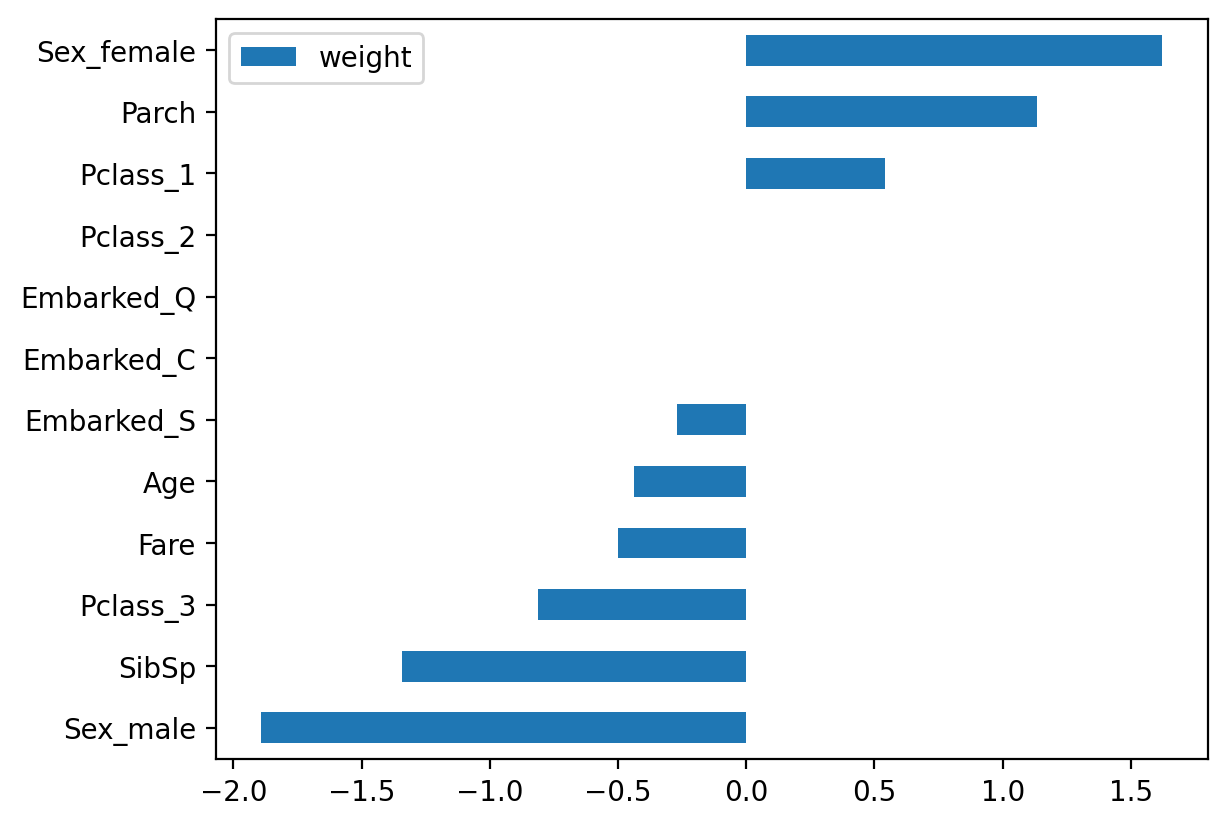

In [10]:
## 각 특성이 얼마나 중요하게 반영되었는지 가중치를 그래프로 보기
# 크기순으로 소팅한 후 수평 막대그래프로 그리기

W.sort_values('weight').plot(kind='barh')

- 위 결과를 보면 생존하는데 가장 많이 기여한 변수는 여성, 요금, 1등석 등이고
- 생존하지 않는데 가장 많이 기여한 변수는 남성, 나이, 3등객실 등인 것을 알 수 있다

# (실습) 오분류된 샘플 찾기
- 위의 모델에서 1)생존자를 사망자로, 2)사망자를 생존자로 오분류한 경우의 X_test 샘플이 무엇인지 각각 찾아보시오

In [14]:
df_test[y_test > y_pred].index

Int64Index([460, 507, 664,  55, 125, 366, 700, 133, 788, 645, 591, 604,  17,
            726, 305, 547, 679, 407, 412, 803, 690, 681, 483, 288, 857, 347,
            107,   3, 301, 455,  88, 142, 737, 192,  21,  81],
           dtype='int64')

In [16]:
df_test[y_test < y_pred]

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp,y_test,y_pred,score
772,2.109899,0,0,1,-0.534196,-0.474326,0,1,0,1,0,-0.475199,0,1,0.609389
593,0.003524,0,1,0,-0.816755,2.006119,0,0,1,1,0,-0.475199,0,1,3.945438
885,0.721125,0,1,0,0.461465,5.726787,0,0,1,1,0,-0.475199,0,1,7.214270
852,-1.593499,1,0,0,-0.176994,0.765897,0,0,1,1,0,0.431350,0,1,1.697880
816,-0.513341,0,0,1,-0.796281,-0.474326,0,0,1,1,0,-0.475199,0,1,1.075418
423,-0.127570,0,0,1,-0.232274,0.765897,0,0,1,1,0,0.431350,0,1,0.814402
678,1.029742,0,0,1,0.940950,6.967010,0,0,1,1,0,0.431350,0,1,6.758764
642,-2.133577,0,0,1,0.418544,2.006119,0,0,1,1,0,2.244449,0,1,0.337648
503,0.566817,0,0,1,-0.619672,-0.474326,0,0,1,1,0,-0.475199,0,1,0.514921
680,0.003524,0,1,0,-0.771953,-0.474326,0,0,1,1,0,-0.475199,0,1,1.107899


# (실습) 특성수 줄이기
- 위의 선형 분류 모델에서 특성을 임의로 3개만 선택하고 이때의 성능을 비교하시오